In [1]:
import math
import warnings
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain

%matplotlib inline

In [2]:
class circle(object):
    
    def __init__(self,x_coordinate,y_coordinate,radius):
        self.x = x_coordinate
        self.y = y_coordinate
        self.r = radius
        
    def __str__(self):
        return str((self.x,self.y,self.r))
        
    def area(self):
        A = math.pi*self.r**2
        return A
        
    def distance(self,circle_2):
        return math.sqrt( (circle_2.x-self.x)**2 + (circle_2.y-self.y)**2 )
    
    def multiDistance(self,circles_list):
        map_result = map(self.distance,circles_list)
        return list(map_result)

    def intersect(self,circle_2):
        # Based on Paul Bourke's work
        d = self.distance(circle_2)
        r0 = self.r
        r1 = circle_2.r
        if (d>r0+r1) | (d<abs(r0-r1)) :
            warnings.warn('no intersection > returning None')
            return None
        if (d==0) & (r0==r1):
            raise OverflowError('overlapping circles > infinite number of solutions')
        a = (r0**2-r1**2+d**2) / (2*d)
        h = math.sqrt(r0**2-a**2)
        P0 = np.array([self.x,self.y])
        P1 = np.array([circle_2.x,circle_2.y])
        P2 = P0+a*(P1-P0)/d
        x_y_diff = P1-P0
        substra_add_end = h*(x_y_diff)/d
        I1 = P2+substra_add_end[::-1]*[1,-1]
        I2 = P2+substra_add_end[::-1]*[-1,1]
        return I1,I2

    def intersectCord(self,circle_2):
        d = self.distance(circle_2)
        r0 = self.r
        r1 = circle_2.r
        a = (1/d)*math.sqrt((-d+r1-r0)*(-d-r1+r0)*(-d+r1+r0)*(d+r1+r0))
        return a
    
    def circularSegment(self,cord):
        a = cord #self.intersectCord(circle_2)
        bR = self.r
        sr = (1/2)*math.sqrt(4*bR**2-a**2)
        h = bR-sr
        bA = bR**2 * math.acos((bR-h)/bR) - (bR-h)*math.sqrt(2*bR*h-h**2)
        return bA
        
    def intersectArea(self,circle_2,show_segments=False):
        a = self.intersectCord(circle_2)
        A_self = self.circularSegment(a)
        A_circle_2 = circle_2.circularSegment(a)
        A_total = A_self+A_circle_2
        if show_segments:
            return [A_total,[A_self,A_circle_2]]
        else:
            return A_total
    
    def includePoint(self,point):
        px = point[0]
        py = point[1]
        result = (px-self.x)**2+(py-self.y)**2<=(self.r)**2
        return result
    
    def multiIntersect(self,circles_list,flat=True):
        map_result = map(self.intersect, circles_list)
        if flat:
            return list(chain.from_iterable(map_result))
        else:
            return list(map_result)
    
    def polygonArea(point_list):
        # Area of 3 or more points
        a=1
    
    def multiIntersectArea(self,circles_list):
        # to do: Identify all intersection points 
        # > From those intersection points, identify those that are contained within all circles
        # If None, the circles do not all intersect into one area
        # If != None, calculate the intersecting Area based on "polygon of intersecting points" + "intersectCords"
        a=1
        
        
    
    

In [4]:
c1.multiIntersect([c2,c3])

[array([  7.        ,  10.26794919]),
 array([  7.        ,  13.73205081]),
 array([  5.0167603 ,  10.25838015]),
 array([  7.9832397 ,  11.74161985])]


 True 
 [array([  7.9832397 ,  11.74161985]), array([  5.0167603 ,  10.25838015]), array([  8.9832397 ,  10.25838015]), array([  6.0167603 ,  11.74161985])]


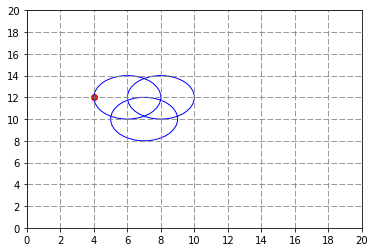

In [3]:
c1 = circle(6,12,2)
c2 = circle(8,12,2)
c3 = circle(7,10,2)

p1 = [4,12]

print(
    '\n'
    ,c1.includePoint(p1)
    ,'\n'
    ,c3.multiIntersect([c1,c2])
)
    
fig,ax = plt.subplots()
ax.set_xlim((0, 20))
ax.set_ylim((0, 20))
plt.grid(b=True, which='major', color='grey', linestyle='--')
plt.xticks(np.arange(0, 21, 2.0))
plt.yticks(np.arange(0, 21, 2.0))
for cplot in [c1,c2,c3]:
    c = plt.Circle((cplot.x,cplot.y), cplot.r, color='blue', fill=False)
    ax.add_artist(c)
    
plt.scatter(p1[0],p1[1], c='red')